In [1]:
import pandas as pd
import os as os

In [2]:
df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_January_2019.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
files = os.listdir('./SalesAnalysis/Sales_Data/')

In [5]:
files

['All_Sales.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
df = pd.DataFrame(columns = df.columns)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
for file in files:
    sales = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    df = pd.concat([df, sales])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",0.0,4.0,23.90,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,4.0,99.99,MA
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2.0,4.0,600.00,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3.0,4.0,11.99,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,4.0,11.99,CA


In [8]:
df = pd.read_csv('./SalesAnalysis/Sales_Data/All_Sales.csv')

In [9]:
clean_df = df.drop(df.loc[df['Order ID'].isna()].index, axis=0)
#clean_df = clean_df.dropna(how='all')

In [10]:
clean_df.loc[clean_df['Order ID'].isna()]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State


In [11]:
df = clean_df

In [12]:
df.drop('Unnamed: 0', axis=1 ,inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)
df['Month'] = df['Order Date'].str[0:2]

In [14]:
df['Month'] = pd.to_numeric(df['Month'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA


In [15]:
df.to_csv('./SalesAnalysis/Sales_Data/All_Sales.csv')

In [16]:
df.describe()
import re

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180949 entries, 0 to 180948
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          180949 non-null  int64  
 1   Product           180949 non-null  object 
 2   Quantity Ordered  180949 non-null  int64  
 3   Price Each        180949 non-null  float64
 4   Order Date        180949 non-null  object 
 5   Purchase Address  180949 non-null  object 
 6   Month             180949 non-null  int64  
 7   Sales             180949 non-null  float64
 8   State             180949 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 12.4+ MB


In [18]:
df = df.drop(df.loc[df['Order Date'].str[0:2] == 'Or'].index, axis = 0)

In [19]:
df.loc[df['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State


In [20]:
df.loc[df['Sales'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State


In [21]:
gb = df.groupby('Month').sum()

gb.head(13)

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1375847602,10545,1.744210e+06,1.754459e+06
2,1811698712,13038,2.119701e+06,2.132651e+06
3,2491346355,16508,2.711310e+06,2.726799e+06
4,3303043078,20033,3.282834e+06,3.305521e+06
5,3255844035,18172,3.043214e+06,3.060241e+06
6,2844131066,14780,2.474239e+06,2.489347e+06
7,3186901634,15597,2.550478e+06,2.564850e+06
8,2806103960,13026,2.151661e+06,2.165103e+06
9,2857689595,12697,2.026563e+06,2.038858e+06


In [22]:
gb.sort_values(by='Month', ascending=True, inplace=True)

In [23]:
gb.head()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1375847602,10545,1.744210e+06,1.754459e+06
2,1811698712,13038,2.119701e+06,2.132651e+06
3,2491346355,16508,2.711310e+06,2.726799e+06
4,3303043078,20033,3.282834e+06,3.305521e+06
5,3255844035,18172,3.043214e+06,3.060241e+06


In [24]:
%matplotlib inline

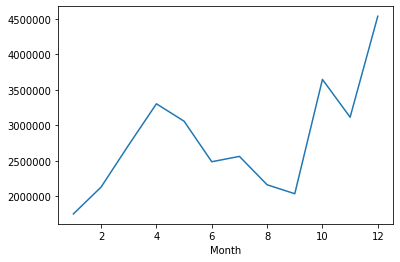

In [25]:
item = gb['Sales'].plot()

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA


In [27]:
df['State'] = df['Purchase Address'].str[-8:-6]

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA


In [29]:
df = pd.read_csv('./SalesAnalysis/Sales_Data/All_Sales.csv')

In [30]:
type(df['Purchase Address'][9])

str

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180949 entries, 0 to 180948
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        180949 non-null  int64  
 1   Order ID          180949 non-null  int64  
 2   Product           180949 non-null  object 
 3   Quantity Ordered  180949 non-null  int64  
 4   Price Each        180949 non-null  float64
 5   Order Date        180949 non-null  object 
 6   Purchase Address  180949 non-null  object 
 7   Month             180949 non-null  int64  
 8   Sales             180949 non-null  float64
 9   State             180949 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 13.8+ MB


In [32]:
df['City'][1] = re.search('[a-zA-Z0-9 ]+, ([a-zA-Z]+),', df['Purchase Address'][1]).group(1)

KeyError: 'City'

In [ ]:
check = df.groupby('Purchase Address')['Purchase Address']

In [ ]:
check

In [ ]:
for i in range(10):
    df['City'][i] = re.search('[a-zA-Z0-9 ]+, ([a-zA-Z]+),', df['Purchase Address'][i]).group(1)

In [ ]:
for i, r in df.iterrows():
    df['Test'][i] = re.search('([a-zA-Z0-9 ]+, )', df['Purchase Address'][i]).group(1)

In [ ]:
df.head()

In [ ]:
df['City'] = df['Purchase Address']

In [ ]:
df.head()

In [ ]:
def city(string):
    array = string.split(", ")
    return array[1] + ", " + array[2][0:2]

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: city(x))

In [ ]:
df.head()

In [ ]:
gb2 = df.groupby('City').sum()['Sales']

In [ ]:
gb2 = gb2.sort_values(ascending=False)

In [ ]:
gb2

In [ ]:
gb2

In [ ]:
gb2.plot()

In [ ]:
df.drop('Unnamed: 0', axis=1,inplace = True)

In [ ]:
df

In [ ]:
df['Order Date']  =pd.to_datetime(df['Order Date'])

In [ ]:
df.head()

In [ ]:
df['Hour'] = df['Order Date'].dt.hour

In [ ]:
df['Minute'] = df['Order Date'].dt.minute

In [ ]:
dupes = df[df['Order ID'].duplicated(keep=False)]

In [ ]:
dupes

In [ ]:
chk = dupes.groupby('Order ID')['Product'].transform(lambda x: '|'.join(x))

In [ ]:
dupes['Order'] = chk

In [ ]:
dupes.head(10)

In [ ]:
dupes = dupes[['Order ID', 'Order']].drop_duplicates()
dupes.head()

In [ ]:
dupes.reset_index(drop=True, inplace=True)

In [ ]:
dupes['Test'] = dupes['Order'].str.replace('|',',')

In [ ]:
dupes.head()

In [ ]:
dupes.head()